### Let us import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

# Data Understanding and Exploration

In [2]:
data = pd.read_csv("train.csv")
pd.options.display.max_columns=300
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We see that there are few columns having null values.
For example Alley, PoolQC, Fence, MiscFeatures, these columns have got very few not null values out of total 1460. Hence these columns should not contribute in building the model.
We should be dropping Id column also as it is not significant in model building

In [5]:
columns_to_drop = ["Alley","PoolQC","Fence","MiscFeature","Id"]
data = data.drop(columns=columns_to_drop)

##### There are still few columns like LotFrontage which is having null values. Let's try to replace those null values 

In [6]:
data["LotFrontage"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1201 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


###### This is a numeric column hence we can replace the null values with zero

In [7]:
data["LotFrontage"] = data["LotFrontage"].fillna(0)

Let us find out if there is a correlation between the target variable which is Sale Price with numeric variables in the dataset

In [8]:
numeric_variables = ["SalePrice","LotFrontage","LotArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
    "2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","TotRmsAbvGrd",
    "Fireplaces","GarageArea","GarageCars","PoolArea"]


In [9]:
corr=data[numeric_variables].corr()
corr

,SalePrice,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,GarageCars,PoolArea
SalePrice,1.000000,0.209624,0.263843,0.386420,-0.011378,0.214479,0.613581,0.605852,0.319334,-0.025606,0.708624,0.227122,-0.016844,0.560664,0.284108,0.168213,0.533723,0.466929,0.623431,0.640409,0.092404
LotFrontage,0.209624,1.000000,0.100739,0.076670,-0.009312,0.160829,0.238274,0.245181,0.042549,0.049981,0.220347,0.010514,-0.027856,0.120548,-0.012952,0.144494,0.221396,0.044018,0.201473,0.165229,0.114106
LotArea,0.263843,0.100739,1.000000,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,0.190015,0.271364,0.180403,0.154871,0.077672
BsmtFinSF1,0.386420,0.076670,0.214103,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,0.044316,0.260011,0.296970,0.224054,0.140491
BsmtFinSF2,-0.011378,-0.009312,0.111170,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.035227,0.046921,-0.018227,-0.038264,0.041709
BsmtUnfSF,0.214479,0.160829,-0.002618,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.250647,0.051575,0.183303,0.214175,-0.035092
TotalBsmtSF,0.613581,0.238274,0.260833,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,0.285573,0.339519,0.486665,0.434585,0.126053
1stFlrSF,0.605852,0.245181,0.299475,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.409516,0.410531,0.489782,0.439317,0.131525
2ndFlrSF,0.319334,0.042549,0.050986,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,0.687501,-0.169494,-0.023855,0.421378,0.609707,0.502901,0.616423,0.194561,0.138347,0.183926,0.081487
LowQualFinSF,-0.025606,0.049981,0.004779,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,0.134683,-0.047143,-0.005842,-0.000710,-0.027080,0.105607,0.131185,-0.021272,-0.067601,-0.094480,0.062157


Plotting correlations on headMap for better understanding

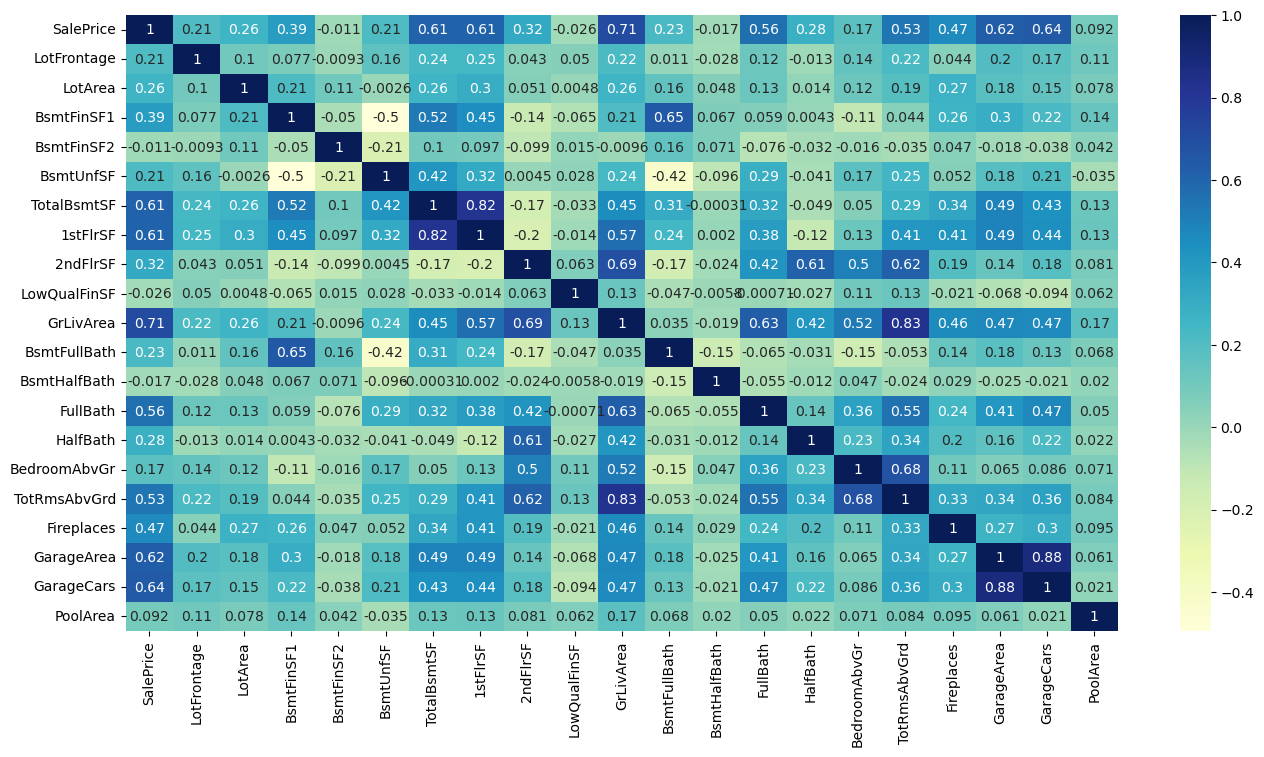

In [10]:
plt.figure(figsize=(16,8))
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

###### Few things clear from above observations are 
SalePrice is highly correlated with TotalBsmtSF, 1stFlSF, GrLivArea,GarageCars & GarageArea

## Data Cleaning

##### Based on our understanding of data dictionary, there are few variables which logically does not mak sense in building the model 
For example we see the column Neighborhood which is the physical location of the property. However we see there are two more columns Condition1 & Condition2 which also describe Proximity to various conditions.

###### Hence we would be picking handful of columns for our analysis from the entire dataset

In [11]:
variables_for_model_building = ["LotFrontage","LotArea","MSSubClass","MSZoning","Utilities","Neighborhood","BldgType","TotalBsmtSF",
                                "Heating","CentralAir","1stFlrSF","2ndFlrSF","BedroomAbvGr","KitchenAbvGr",
                                "GarageArea","PoolArea","YearBuilt","YearRemodAdd","Electrical",
                                "GarageType","SalePrice","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF",
                                "LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath",
                                "TotRmsAbvGrd","Fireplaces","GarageCars"]

In [12]:
housing_dataset = data[variables_for_model_building]
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1460 non-null   float64
 1   LotArea       1460 non-null   int64  
 2   MSSubClass    1460 non-null   int64  
 3   MSZoning      1460 non-null   object 
 4   Utilities     1460 non-null   object 
 5   Neighborhood  1460 non-null   object 
 6   BldgType      1460 non-null   object 
 7   TotalBsmtSF   1460 non-null   int64  
 8   Heating       1460 non-null   object 
 9   CentralAir    1460 non-null   object 
 10  1stFlrSF      1460 non-null   int64  
 11  2ndFlrSF      1460 non-null   int64  
 12  BedroomAbvGr  1460 non-null   int64  
 13  KitchenAbvGr  1460 non-null   int64  
 14  GarageArea    1460 non-null   int64  
 15  PoolArea      1460 non-null   int64  
 16  YearBuilt     1460 non-null   int64  
 17  YearRemodAdd  1460 non-null   int64  
 18  Electrical    1459 non-null 

###### The variable GarageType has got few null values, let us replace this null value with 'No Garage' to indicate that the said property has got no garage

In [13]:
housing_dataset["GarageType"] = housing_dataset["GarageType"].fillna("No Garage")

##### Of the 21 columns we have selected, we see some are of categorical type, let us convert them to dummy variables

In [14]:
categorical_variables = ["Neighborhood","MSSubClass","MSZoning","Utilities","BldgType","Heating","Electrical","GarageType"]

###### Let us loop through all categorical variables and create dummy variables dataframe &  concat the dataframe of dummy variables with main dataset

In [15]:
for categorical_var in categorical_variables:
    print("Creating dummy variabels for categorical variable {}".format(categorical_var))
    dummy_var_df = pd.get_dummies(housing_dataset[categorical_var],prefix=categorical_var+"_",dtype=int,drop_first=True)
    housing_dataset = pd.concat([housing_dataset,dummy_var_df],axis=1)

Creating dummy variabels for categorical variable Neighborhood
Creating dummy variabels for categorical variable MSSubClass
Creating dummy variabels for categorical variable MSZoning
Creating dummy variabels for categorical variable Utilities
Creating dummy variabels for categorical variable BldgType
Creating dummy variabels for categorical variable Heating
Creating dummy variabels for categorical variable Electrical
Creating dummy variabels for categorical variable GarageType


In [16]:
housing_dataset.drop(columns=categorical_variables,inplace=True)
housing_dataset.shape

(1460, 87)

In [17]:
housing_dataset.head(10)

,LotFrontage,LotArea,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,GarageArea,PoolArea,YearBuilt,YearRemodAdd,SalePrice,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NAmes,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__160,MSSubClass__180,MSSubClass__190,MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,Utilities__NoSeWa,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,Heating__GasA,Heating__GasW,Heating__Grav,Heating__OthW,Heating__Wall,Electrical__FuseF,Electrical__FuseP,Electrical__Mix,Electrical__SBrkr,GarageType__Attchd,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,GarageType__No Garage
0,65.0,8450,856,Y,856,854,3,1,548,0,2003,2003,208500,706,0,150,0,1710,1,0,2,1,8,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,80.0,9600,1262,Y,1262,0,3,1,460,0,1976,1976,181500,978,0,284,0,1262,0,1,2,0,6,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,68.0,11250,920,Y,920,866,3,1,608,0,2001,2002,223500,486,0,434,0,1786,1,0,2,1,6,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,60.0,9550,756,Y,961,756,3,1,642,0,1915,1970,140000,216,0,540,0,1717,1,0,1,0,7,1,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,84.0,14260,1145,Y,1145,1053,4,1,836,0,2000,2000,250000,655,0,490,0,2198,1,0,2,1,9,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
5,85.0,14115,796,Y,796,566,1,1,480,0,1993,1995,143000,732,0,64,0,1362,1,0,1,1,5,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
6,75.0,10084,1686,Y,1694,0,3,1,636,0,2004,2005,307000,1369,0,317,0,1694,1,0,2,0,7,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
7,0.0,10382,1107,Y,1107,983,3,1,484,0,1973,1973,200000,859,32,216,0,2090,1,0,2,1,7,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
8,51.0,6120,952,Y,1022,752,2,2,468,0,1931,1950,129900,0,0,952,0,1774,0,0,2,0,8,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9,50.0,7420,991,Y,1077,0,2,2,205,0,1939,1950,118000,851,0,140,0,1077,1,0,1,0,5,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0


###### CentralAir is a binary categorical variable, let's replace it with binary values

In [18]:
housing_dataset["CentralAir"] = housing_dataset["CentralAir"].map({'Y':1,'N':0})

##### Columns YearBuilt and YearRemodAdd will have more impact on sale of the property as the one that was build 10 years back will be sold at a higher price than the one that was built 30 years back. 

Let us convert this column into a numeric column ageOfProperty describing the age of the property. If property that was built in 2014 will have age of 10 years, hence the column ageOfProperty will have numeric value 10 

In [19]:
current_year = datetime.now().year
housing_dataset["ageOfProperty"] =  current_year - housing_dataset["YearBuilt"]

###### Simillary we can create another column ageSinceRemodel which would be current year subtracted by YearRemodAdd that will describe age of the property since it has been remodeled

In [20]:
housing_dataset["ageSinceRemodel"] =  current_year - housing_dataset["YearRemodAdd"]

##### Let us drop the variables YearBuilt & YearRemodAdd from the dataset

In [21]:
housing_dataset = housing_dataset.drop(columns=["YearBuilt","YearRemodAdd"])
housing_dataset.head()

,LotFrontage,LotArea,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,GarageArea,PoolArea,SalePrice,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NAmes,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__160,MSSubClass__180,MSSubClass__190,MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,Utilities__NoSeWa,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,Heating__GasA,Heating__GasW,Heating__Grav,Heating__OthW,Heating__Wall,Electrical__FuseF,Electrical__FuseP,Electrical__Mix,Electrical__SBrkr,GarageType__Attchd,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,GarageType__No Garage,ageOfProperty,ageSinceRemodel
0,65.0,8450,856,1,856,854,3,1,548,0,208500,706,0,150,0,1710,1,0,2,1,8,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,21,21
1,80.0,9600,1262,1,1262,0,3,1,460,0,181500,978,0,284,0,1262,0,1,2,0,6,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,48,48
2,68.0,11250,920,1,920,866,3,1,608,0,223500,486,0,434,0,1786,1,0,2,1,6,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,23,22
3,60.0,9550,756,1,961,756,3,1,642,0,140000,216,0,540,0,1717,1,0,1,0,7,1,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,109,54
4,84.0,14260,1145,1,1145,1053,4,1,836,0,250000,655,0,490,0,2198,1,0,2,1,9,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,24,24


## Data Preparation and Model Building

### Linear Regression
Lets see if we can visually see a linear relationship between the target variable and few of the independent variable

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

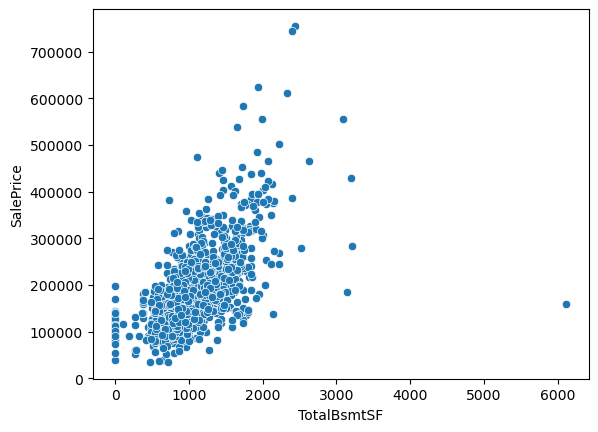

In [22]:
sns.scatterplot(data=housing_dataset, x="TotalBsmtSF",y="SalePrice")

<Axes: xlabel='LotArea', ylabel='SalePrice'>

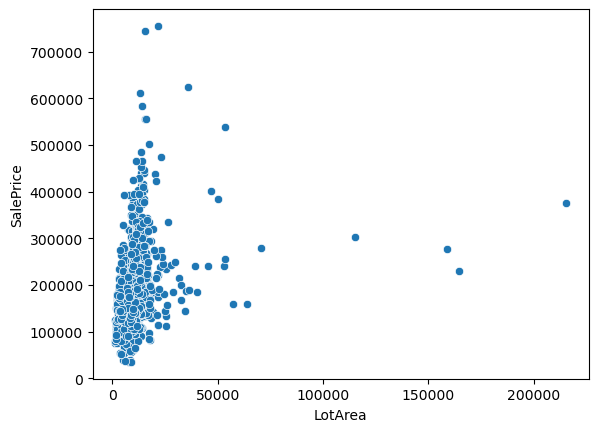

In [23]:
sns.scatterplot(data=housing_dataset, x="LotArea",y="SalePrice")

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

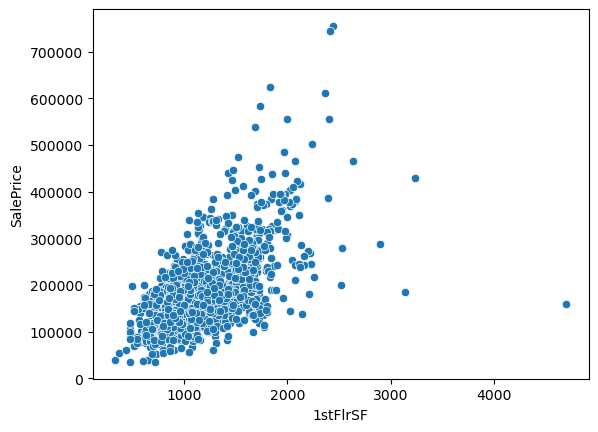

In [24]:
sns.scatterplot(data=housing_dataset, x="1stFlrSF",y="SalePrice")

<Axes: xlabel='2ndFlrSF', ylabel='SalePrice'>

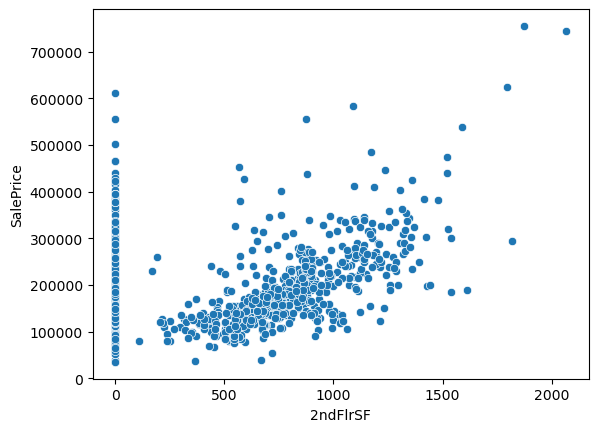

In [25]:
sns.scatterplot(data=housing_dataset, x="2ndFlrSF",y="SalePrice")

<Axes: xlabel='BedroomAbvGr', ylabel='SalePrice'>

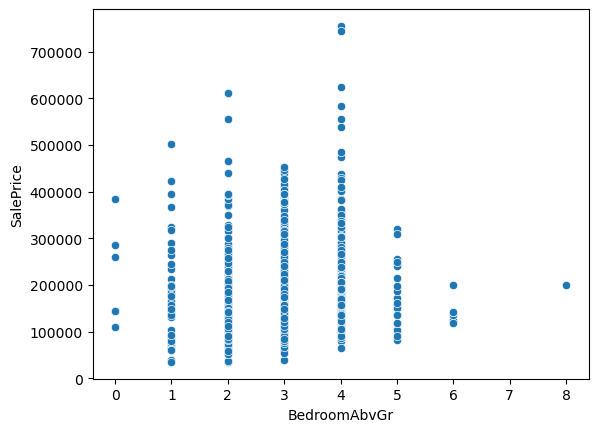

In [26]:
sns.scatterplot(data=housing_dataset, x="BedroomAbvGr",y="SalePrice")

###### We do see a linear relationship of SalePrice with 1stFlrSF, TotalBsmtSF however for 2ndFlrSF and BedroomAbvGr we don't see the price linearly increasing 


#### Let us build LinearRegression model

First we need to scale the numeric variables

In [27]:
scaler = MinMaxScaler()
# Split into train and test dataset
df_train,df_test = train_test_split(housing_dataset, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [28]:
df_train[numeric_variables] = scaler.fit_transform(df_train[numeric_variables])
df_test[numeric_variables] = scaler.transform(df_test[numeric_variables])

### Dividing into X and Y sets for the model building

In [29]:
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test  = df_test.pop('SalePrice')
X_test  = df_test

In [30]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

##### Print the coefficients and intercept

In [31]:
print(lm.intercept_)
print(lm.coef_)

0.04711297790594027
[-1.15346923e-02  7.54663277e-02  6.27085588e-02  5.31737696e-03
  1.81826619e-01  1.42878392e-01 -9.76170820e-02 -4.66897548e-02
 -3.27541579e-02 -4.47419815e-02  6.28430474e-02  4.42861922e-03
  9.39013261e-03 -1.91033101e-02  2.05744940e-01  4.86377157e-02
  4.05072499e-02  2.33350809e-02  5.76765780e-03  2.87126858e-02
  2.94593190e-02  1.04274867e-01  1.44165198e-02  4.35442323e-02
 -2.27653246e-03  1.11919302e-03  8.21759334e-04  3.26825333e-02
 -3.57819569e-02 -1.31770877e-02 -3.29097741e-03  1.41380735e-03
 -1.91773086e-02 -1.68973770e-02  8.07308875e-03 -1.74501000e-02
  8.18433812e-02  9.38436102e-02 -2.04710697e-02 -5.39838416e-03
 -2.77695482e-02 -1.01064145e-02  5.14919359e-02  7.70900326e-02
  1.83432164e-02  3.69713855e-02 -1.39494970e-02  1.29095554e-02
 -4.71913053e-03 -2.19875295e-02 -3.98777848e-02 -2.98501026e-02
 -2.41818160e-02 -1.22324155e-02 -7.89655741e-03 -5.99363548e-03
 -3.83609480e-02 -7.72014889e-02 -3.84710169e-02 -9.96877769e-03
  3.9

###### Let us calculate all the metrics like r2 score, rss and mse and store these metrics into a list. This will be used for comaparison with Lasso & Ridge models

In [32]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8310033448342312
0.820330773088875
2.0795086510243577
0.9766497952849612
0.0020367371704450125
0.002229794053162012


#### Let us do resudual analysis

In [33]:
y_train_res = y_train - y_pred_train

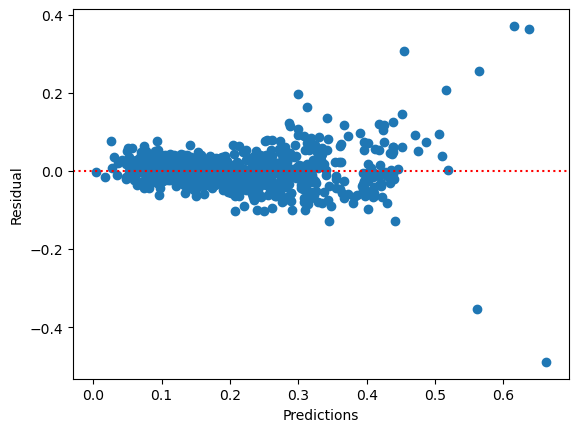

In [34]:
plt.scatter( y_pred_train , y_train_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

We can see that the residuals vs prediction does follow a pattern, the predictions are not following under a horizontal band
Let us plot histogram of residuals

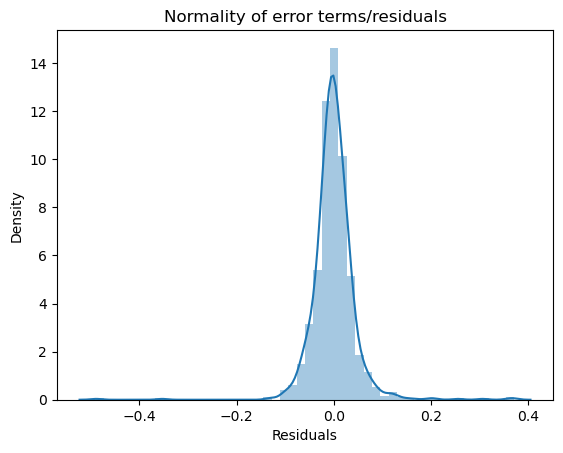

In [35]:
p = sns.distplot(y_train_res,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

## Ridge and Lasso Regression

Let us now use regularization (Ridge and Lasso) for model building and compare with coefficients received from linear regression model

### Ridge Regression

In [36]:
lambdas = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = lambdas, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [37]:
print(model_cv.best_params_)

{'alpha': 3.0}


The best lambda value we have received from Ridge is 3.0. Let us fit the Ridge model using the lambda value as 3.0 and print the coefficients

In [38]:
ridge = Ridge(3.0)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 6.28354972e-06  3.94882153e-02  6.67136288e-02  5.15355253e-03
  1.12151067e-01  8.60684224e-02 -4.69587052e-02 -3.45316095e-02
  2.71504210e-02 -6.19602652e-03  6.37311597e-02  1.10368097e-02
  1.35502350e-02 -1.65340038e-02  1.25616620e-01  4.93413149e-02
  2.82068151e-02  4.05407123e-02  1.47260099e-02  5.25934320e-02
  4.45114162e-02  6.73367992e-02 -2.97903311e-03  1.73800450e-02
 -5.23579792e-03  1.52190127e-03 -1.23840968e-02  2.88686730e-02
 -3.65125862e-02 -2.69319975e-02 -1.28679878e-02 -1.64083097e-02
 -2.59781963e-02 -2.19338505e-02 -8.83060226e-03 -2.45306126e-02
  7.72427051e-02  7.45430731e-02 -2.14454659e-02 -5.76332281e-03
 -3.32701832e-02 -1.83824058e-02  3.08451212e-02  5.70173740e-02
  9.24345056e-03  2.53084009e-02 -7.50339333e-03  1.16403653e-02
  3.00299115e-03 -8.95121047e-03 -2.33578673e-02 -8.50171765e-03
 -3.49485809e-04 -1.01360329e-02 -7.89660201e-03 -7.64223573e-03
 -1.83526918e-02 -4.15771677e-02 -8.05838766e-03 -6.89111226e-03
  7.52628945e-03  1.66253

Let's calculate the same parameters that we had calculated earlier for Linear Regression

In [39]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8226325573060883
0.8156695016976426
2.182511429769211
1.0019876332012267
0.002137621380772979
0.0022876429981763167


### Lasso

Let's now use the Lasso regression model for model building and follow the same steps to get the best lambda parameter values

In [40]:
lasso = Lasso()

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = lambdas, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [41]:
print(model_cv.best_params_)

{'alpha': 0.0001}


The best lambda value we have received now is 0.0001. Let's fit the model using this lambda value and print the coefficients

In [42]:
lasso = Lasso(0.0001)        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [43]:
lasso.coef_

array([-0.        ,  0.03737097,  0.06059787,  0.00452396,  0.        ,
        0.00794465, -0.05901705, -0.04171627, -0.        , -0.00109841,
        0.02608501,  0.        , -0.        , -0.03764246,  0.43273762,
        0.04723066,  0.02733247,  0.02082501,  0.00435024,  0.01899067,
        0.03545792,  0.07994004,  0.        ,  0.02809794,  0.        ,
        0.00401902,  0.        ,  0.03486946, -0.02918213, -0.01241475,
       -0.00528168, -0.        , -0.01502199, -0.01097761,  0.        ,
       -0.0121256 ,  0.08384918,  0.08842201, -0.01369052, -0.        ,
       -0.02243361, -0.00712893,  0.04045309,  0.06822982,  0.01497768,
        0.03328628, -0.        ,  0.        ,  0.00049954, -0.00433859,
       -0.02038584, -0.00221686,  0.        , -0.00496573, -0.        ,
       -0.00476755, -0.01149545, -0.03349894, -0.        , -0.00062636,
       -0.        ,  0.        ,  0.00434166,  0.00283887, -0.        ,
       -0.00049733, -0.        , -0.04487895, -0.02342517, -0.  

As we can see Lasso regression has made most of the coefficients to almost zero

In [44]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8247253937767756
0.8184356416155442
2.156759017440669
0.9869513911524731
0.002112398645877247
0.002253313678430304


Let us now store all the metrics received from each model into a dataframe for comparison

In [45]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.831003,0.822633,0.824725
1,R2 Score (Test),0.820331,0.815670,0.818436
2,RSS (Train),2.079509,2.182511,2.156759
3,RSS (Test),0.976650,1.001988,0.986951
4,MSE (Train),0.045130,0.046234,0.045961
5,MSE (Test),0.047221,0.047829,0.047469


In [51]:
lm_r2_score_train = final_metric.iloc[0][1]
lm_r2_score_test = final_metric.iloc[1][1]
ridge_r2_score_train = final_metric.iloc[0][2]
ridge_r2_score_test = final_metric.iloc[1][2]
lasso_r2_score_train = final_metric.iloc[0][3]
lasso_r2_score_test = final_metric.iloc[1][3]

In [55]:
print("R2 score difference of train vs test dataset for linear regression model is {}", lm_r2_score_train - lm_r2_score_test)

R2 score difference of train vs test dataset for linear regression model is {} 0.010672571745356185


In [56]:
print("R2 score difference of train vs test dataset for ridge regression model is {}", ridge_r2_score_train - ridge_r2_score_test)

R2 score difference of train vs test dataset for ridge regression model is {} 0.0069630556084456785


In [57]:
print("R2 score difference of train vs test dataset for lasso regression model is {}", lasso_r2_score_train - lasso_r2_score_test)

R2 score difference of train vs test dataset for lasso regression model is {} 0.006289752161231399


In [60]:
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.831003,0.822633,0.824725
1,R2 Score (Test),0.820331,0.815670,0.818436
2,RSS (Train),2.079509,2.182511,2.156759
3,RSS (Test),0.976650,1.001988,0.986951
4,MSE (Train),0.045130,0.046234,0.045961
5,MSE (Test),0.047221,0.047829,0.047469


###### Observations from comparison of models is
r2 score is very close to training and test dataset for lasso regression
mse 